<a href="https://colab.research.google.com/github/joao-zip/projeto-ia/blob/main/notebooks/data_cleaning_and_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [1]:
# Clonando os dados para que o notebook possa ser executado no Google Colab.

!git clone https://github.com/joao-zip/projeto-ia.git

!ls

Cloning into 'projeto-ia'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 47 (delta 16), reused 42 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 5.49 MiB | 15.80 MiB/s, done.
Resolving deltas: 100% (16/16), done.
projeto-ia  sample_data


In [2]:
import pandas as pd
import glob
import os

nome_repo = "projeto-ia"
caminho_dados = os.path.join(nome_repo, 'data/')

caminho_dados

padrao_arquivos = os.path.join(caminho_dados, '2024*_CPGF.csv')
lista_arquivos = glob.glob(padrao_arquivos)


if not lista_arquivos:
    print("Nenhum arquivo encontrado.")
else:
    print(f"Arquivos encontrados: {lista_arquivos}")

Arquivos encontrados: ['projeto-ia/data/202405_CPGF.csv', 'projeto-ia/data/202408_CPGF.csv', 'projeto-ia/data/202404_CPGF.csv', 'projeto-ia/data/202406_CPGF.csv', 'projeto-ia/data/202402_CPGF.csv', 'projeto-ia/data/202409_CPGF.csv', 'projeto-ia/data/202403_CPGF.csv', 'projeto-ia/data/202412_CPGF.csv', 'projeto-ia/data/202401_CPGF.csv', 'projeto-ia/data/202411_CPGF.csv', 'projeto-ia/data/202410_CPGF.csv', 'projeto-ia/data/202407_CPGF.csv']


In [3]:
if not lista_arquivos:
    print("AVISO: Nenhum arquivo de dados encontrado! Verifique se:")
    print("1. O repositório foi clonado corretamente.")
    print("2. Os arquivos .csv estão na pasta 'data/' do seu repositório no GitHub.")
else:
    lista_dfs = []
    for arquivo in lista_arquivos:
        df_mes = pd.read_csv(arquivo, sep=';', encoding='latin-1', low_memory=False)
        lista_dfs.append(df_mes)

    df_2024_completo = pd.concat(lista_dfs, ignore_index=True)
    print("\n--- Dados carregados com sucesso! ---")
    print(df_2024_completo.info())

    print(f"\n\n{df_2024_completo.head()}")


--- Dados carregados com sucesso! ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143150 entries, 0 to 143149
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CÓDIGO ÓRGÃO SUPERIOR   143150 non-null  int64 
 1   NOME ÓRGÃO SUPERIOR     143150 non-null  object
 2   CÓDIGO ÓRGÃO            143150 non-null  int64 
 3   NOME ÓRGÃO              143150 non-null  object
 4   CÓDIGO UNIDADE GESTORA  143150 non-null  int64 
 5   NOME UNIDADE GESTORA    143150 non-null  object
 6   ANO EXTRATO             143150 non-null  int64 
 7   MÊS EXTRATO             143150 non-null  int64 
 8   CPF PORTADOR            104576 non-null  object
 9   NOME PORTADOR           143150 non-null  object
 10  CNPJ OU CPF FAVORECIDO  143150 non-null  int64 
 11  NOME FAVORECIDO         143150 non-null  object
 12  TRANSAÇÃO               143150 non-null  object
 13  DATA TRANSAÇÃO          104576 non-null  object
 1

In [4]:
df = df_2024_completo.copy() # para evitar os avisos do pandas

# 1 - Limpeza da coluna de VALOR (object para numérico)
df['VALOR TRANSAÇÃO'] = df['VALOR TRANSAÇÃO'].str.replace(',', '.', regex=False)
df['VALOR TRANSAÇÃO'] = pd.to_numeric(df['VALOR TRANSAÇÃO'], errors='coerce')

# 2 - Limpeza da coluna de DATA
df['DATA TRANSAÇÃO'] = pd.to_datetime(df['DATA TRANSAÇÃO'], format='%d/%m/%Y', errors='coerce')

# 3 - Lidando com NaN
df.dropna(subset=['VALOR TRANSAÇÃO', 'DATA TRANSAÇÃO'], inplace=True)

# 4 - Como ficou
df.info()
df['VALOR TRANSAÇÃO'].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 104576 entries, 0 to 142802
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CÓDIGO ÓRGÃO SUPERIOR   104576 non-null  int64         
 1   NOME ÓRGÃO SUPERIOR     104576 non-null  object        
 2   CÓDIGO ÓRGÃO            104576 non-null  int64         
 3   NOME ÓRGÃO              104576 non-null  object        
 4   CÓDIGO UNIDADE GESTORA  104576 non-null  int64         
 5   NOME UNIDADE GESTORA    104576 non-null  object        
 6   ANO EXTRATO             104576 non-null  int64         
 7   MÊS EXTRATO             104576 non-null  int64         
 8   CPF PORTADOR            104576 non-null  object        
 9   NOME PORTADOR           104576 non-null  object        
 10  CNPJ OU CPF FAVORECIDO  104576 non-null  int64         
 11  NOME FAVORECIDO         104576 non-null  object        
 12  TRANSAÇÃO               104576 non-

,VALOR TRANSAÇÃO
count,104576.000000
mean,538.880169
std,1385.544455
min,0.040000
25%,103.000000
50%,257.285000
75%,620.000000
max,189650.000000


In [5]:
# Agora vou criar novas colunas

df['Mes'] = df['DATA TRANSAÇÃO'].dt.month
df['DiaDaSemana'] = df['DATA TRANSAÇÃO'].dt.dayofweek
df['Dia'] = df['DATA TRANSAÇÃO'].dt.day

df[['DATA TRANSAÇÃO', 'Mes', 'DiaDaSemana', 'Dia']].head()

,DATA TRANSAÇÃO,Mes,DiaDaSemana,Dia
0,2024-04-12,4,4,12
1,2024-04-23,4,1,23
2,2024-04-19,4,4,19
3,2024-03-27,3,2,27
4,2024-04-12,4,4,12


In [19]:
import numpy as np

# --- Dicionário de Palavras-Chave v2.0 ---
# Mantemos as antigas e adicionamos as novas que descobrimos

# Categorias existentes
keywords_hospedagem = ['HOTEL', 'POUSADA', 'RESORT', 'MOTEL']
keywords_transporte_aereo = ['AEREAS', 'AEREA', 'GOL', 'LATAM', 'AZUL', 'LINHAS', 'AEROLINEAS', 'TAP', 'PASSAGENS']
keywords_combustivel = ['POSTO', 'COMBUSTIVEIS', 'PETRO', 'GASOLINA']
keywords_restaurante = ['RESTAURANTE', 'CHURRASCARIA', 'BAR E', 'COM E BEB']
keywords_aluguel_carros = ['LOCADORA', 'ALUGUEL DE CARROS', 'RENT A CAR', 'LOCALIZA', 'MOVIDA', 'UNIDAS']

# Novas categorias baseadas na sua análise
keywords_servicos = ['SERVICOS', 'CONSULTORIA', 'ASSESSORIA', 'PROJETOS', 'SERVIÇO']
keywords_construcao_ferragens = ['CONSTRUCAO', 'MATERIAIS', 'MATERIAL', 'FERRAGENS', 'FERRAMENTAS', 'MAQUINAS', 'ELETRICA']
keywords_pecas_equipamentos = ['PECAS', 'AUTO', 'EQUIPAMENTOS', 'AUTOMOTIVOS']
keywords_informatica_tecnologia = ['INFORMATICA', 'INFORMACAO', 'PAGARME', 'TECNOLOGIA', 'SISTEMAS']
keywords_comercio_geral = ['COMERCIO', 'COMERCIAL', 'DISTRIBUIDORA', 'PRODUTOS', 'CASA']
keywords_supermercado = ['SUPERMERCADOS', 'MERCADO', 'ATACADAO', 'MERCEARIA']


# --- Lógica de Categorização Atualizada ---
conditions = [
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_hospedagem), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_transporte_aereo), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_combustivel), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_restaurante), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_aluguel_carros), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_servicos), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_construcao_ferragens), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_pecas_equipamentos), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_informatica_tecnologia), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_comercio_geral), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_supermercado), case=False, na=False)
]

choices = [
    'Hospedagem',
    'Transporte Aéreo',
    'Combustível',
    'Restaurante',
    'Aluguel de Veículos',
    'Serviços',
    'Construção/Ferragens',
    'Peças/Equipamentos',
    'Informática/Tecnologia',
    'Comércio Geral',
    'Supermercado'
]

# Aplicamos a nova lógica
df['TipoDeGasto_v2'] = np.select(conditions, choices, default='Outros')


# --- Verificando o Resultado ---
print("\n--- Distribuição dos Tipos de Gasto (VERSÃO 2.0) ---")
print(df['TipoDeGasto_v2'].value_counts())


--- Distribuição dos Tipos de Gasto (VERSÃO 2.0) ---
TipoDeGasto_v2
Outros                    54933
Comércio Geral            13319
Construção/Ferragens      10730
Informática/Tecnologia     7030
Combustível                6547
Peças/Equipamentos         3982
Serviços                   3353
Supermercado               2717
Restaurante                1434
Transporte Aéreo            274
Hospedagem                  130
Aluguel de Veículos         127
Name: count, dtype: int64


/tmp/ipython-input-20-3182124689.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gastos_por_orgao.values, y=gastos_por_orgao.index, palette='viridis')


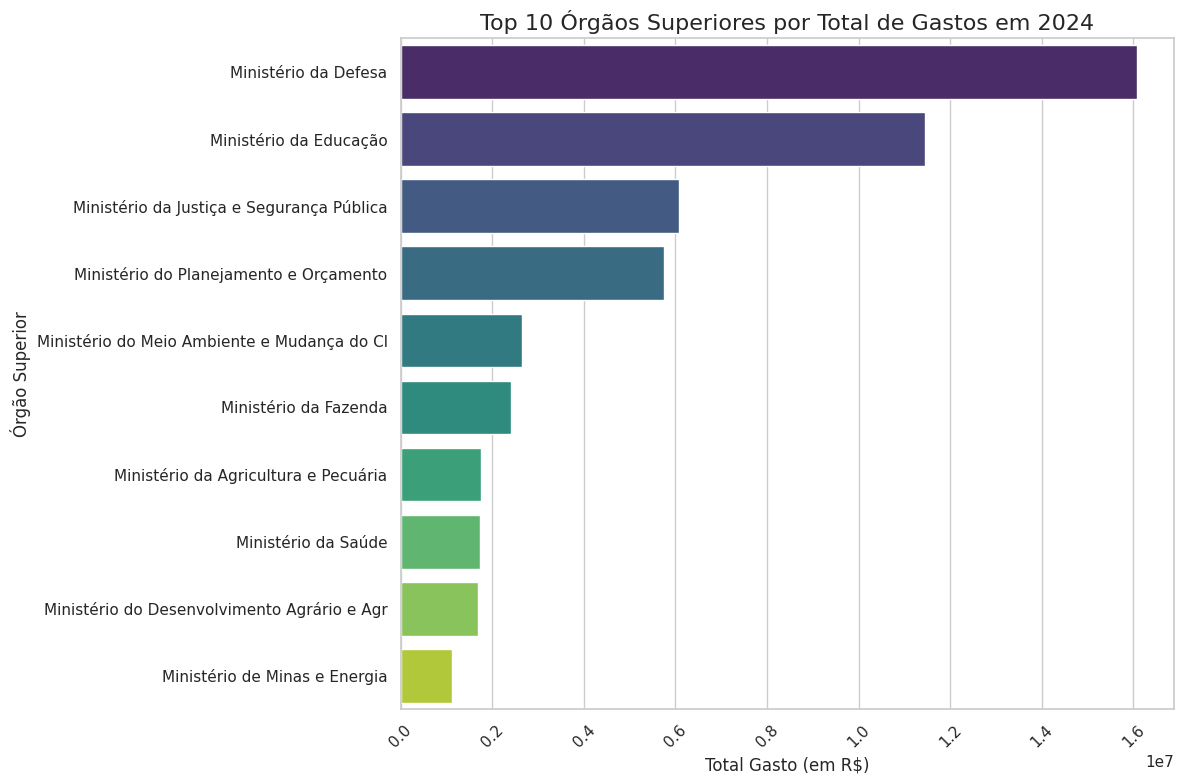

In [20]:
# Gastos por órgão, talvez?
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

gastos_por_orgao = df.groupby('NOME ÓRGÃO SUPERIOR')['VALOR TRANSAÇÃO'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=gastos_por_orgao.values, y=gastos_por_orgao.index, palette='viridis')
plt.title('Top 10 Órgãos Superiores por Total de Gastos em 2024', fontsize=16)
plt.xlabel('Total Gasto (em R$)', fontsize=12)
plt.ylabel('Órgão Superior', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Foram encontradas 10720 transações de SAQUE.

Análise Descritiva dos Valores de Saque:
count    10720.000000
mean       575.905142
std        440.775814
min          2.000000
25%        200.000000
50%        500.000000
75%       1000.000000
max       4979.480000
Name: VALOR TRANSAÇÃO, dtype: float64


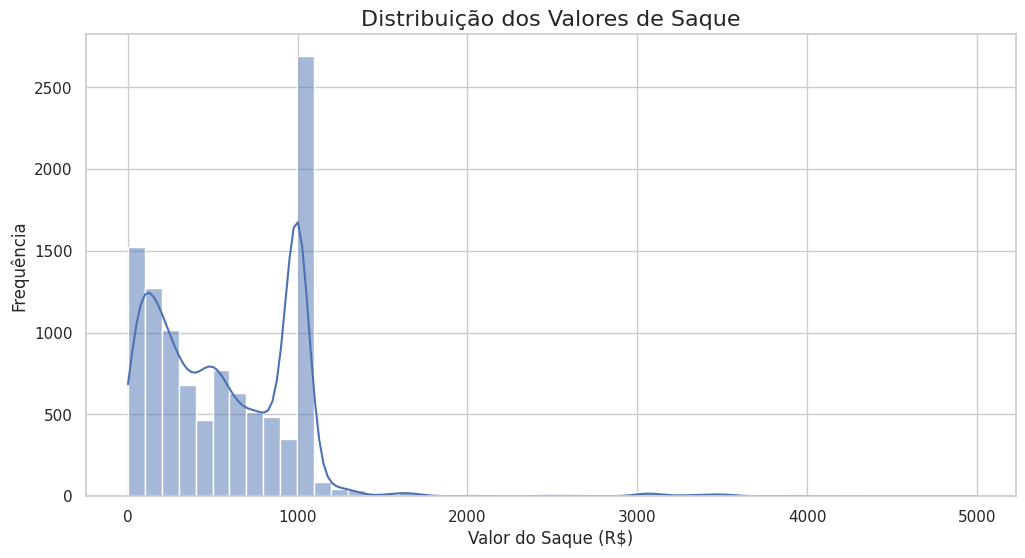

In [21]:
df_saques = df[df['TRANSAÇÃO'].str.contains('SAQUE', case=False, na=False)]

print(f"\nForam encontradas {len(df_saques)} transações de SAQUE.")

print("\nAnálise Descritiva dos Valores de Saque:")
print(df_saques['VALOR TRANSAÇÃO'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(df_saques['VALOR TRANSAÇÃO'], bins=50, kde=True)
plt.title('Distribuição dos Valores de Saque', fontsize=16)
plt.xlabel('Valor do Saque (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

In [22]:
# Ou podemos apenas ordenar os gastos

print("\n--- Top 10 Maiores Transações Individuais ---")

colunas_relevantes = [
    'DATA TRANSAÇÃO',
    'NOME ÓRGÃO SUPERIOR',
    'NOME FAVORECIDO',
    'TipoDeGasto',
    'VALOR TRANSAÇÃO'
]

# Ordenamos o DataFrame pelo valor e mostramos os maiores
top_10_gastos = df[colunas_relevantes].sort_values(by='VALOR TRANSAÇÃO', ascending=False).head(10)

# Exibindo o resultado formatado
print(top_10_gastos.to_string())


--- Top 10 Maiores Transações Individuais ---
       DATA TRANSAÇÃO                        NOME ÓRGÃO SUPERIOR                                    NOME FAVORECIDO TipoDeGasto  VALOR TRANSAÇÃO
102524     2024-10-03                       Ministério da Defesa                     MARAJO LOCACAO E SERVICOS LTDA      Outros        189650.00
102428     2024-10-04                       Ministério da Defesa               FRANCISCO E. SILVA CAPIISTRANIO LTDA      Outros        168000.00
108638     2024-10-17  Ministério da Justiça e Segurança Pública                                     SEM INFORMACAO      Outros        122038.19
124072     2024-09-17  Ministério da Justiça e Segurança Pública                                     SEM INFORMACAO      Outros        103864.77
109332     2024-10-24  Ministério da Justiça e Segurança Pública                                     SEM INFORMACAO      Outros         52812.38
102525     2024-10-08                       Ministério da Defesa                   

In [23]:
# 1. Selecionando as features que usaremos no modelo
features_para_modelo = [
    'VALOR TRANSAÇÃO',
    'Mes',
    'DiaDaSemana',
    'Dia',
    'TipoDeGasto',
    'NOME ÓRGÃO SUPERIOR',
    'TRANSAÇÃO'
]

df_model = df[features_para_modelo].copy()

print("--- DataFrame antes do Encoding ---")
print(df_model.head())


# 2. Aplicando One-Hot Encoding nas colunas categóricas
print("\nConvertendo colunas categóricas para formato numérico...")
df_encoded = pd.get_dummies(df_model)


print("\n--- DataFrame pronto para o modelo (depois do Encoding) ---")
print(f"O número de colunas aumentou de {df_model.shape[1]} para {df_encoded.shape[1]}.")
print(df_encoded.head())

--- DataFrame antes do Encoding ---
   VALOR TRANSAÇÃO  Mes  DiaDaSemana  Dia TipoDeGasto  \
0            28.00    4            4   12      Outros   
1           134.49    4            1   23      Outros   
2           450.00    4            4   19      Outros   
3            30.00    3            2   27      Outros   
4           600.00    4            4   12      Outros   

        NOME ÓRGÃO SUPERIOR                TRANSAÇÃO  
0  Advocacia-Geral da União  COMPRA A/V - R$ - APRES  
1  Advocacia-Geral da União  COMPRA A/V - R$ - APRES  
2  Advocacia-Geral da União        SAQUE CASH/ATM BB  
3  Advocacia-Geral da União        SAQUE CASH/ATM BB  
4  Advocacia-Geral da União        SAQUE CASH/ATM BB  

Convertendo colunas categóricas para formato numérico...

--- DataFrame pronto para o modelo (depois do Encoding) ---
O número de colunas aumentou de 7 para 45.
   VALOR TRANSAÇÃO  Mes  DiaDaSemana  Dia  TipoDeGasto_Aluguel de Veículos  \
0            28.00    4            4   12          

Isolation Forest

In [24]:
from sklearn.ensemble import IsolationForest

# 1. Instanciando o modelo
# O parâmetro 'contamination' é a nossa estimativa da proporção de anomalias nos dados.
# É um dos parâmetros que você pode variar para ver a influência no resultado. [cite: 47]
# Começaremos com 0.5%, ou seja, 0.005.
# 'n_jobs=-1' usa todos os processadores disponíveis para acelerar o treinamento.
iso_forest = IsolationForest(n_estimators=100, contamination=0.005, n_jobs=-1, random_state=42)

print("Treinando o modelo Isolation Forest... Isso pode levar um momento.")
# 2. Treinando o modelo e fazendo as previsões
# O método fit_predict() treina e prevê de uma vez só.
# Ele retorna:  1 para pontos normais (inliers)
#               -1 para anomalias (outliers)
previsoes = iso_forest.fit_predict(df_encoded)

# 3. Adicionando os resultados ao nosso DataFrame original
# Isso nos permitirá ver exatamente QUAIS transações foram classificadas como anomalias.
df['Anomalia_IsolationForest'] = previsoes

print("Treinamento concluído!")

Treinando o modelo Isolation Forest... Isso pode levar um momento.
Treinamento concluído!


In [25]:
# Filtramos o DataFrame para as anomalias
anomalias_if = df[df['Anomalia_IsolationForest'] == -1]

print(f"\nO modelo Isolation Forest encontrou {len(anomalias_if)} anomalias potenciais.")

# Vamos ver as anomalias encontradas, ordenando pelas de maior valor
# Usamos as mesmas colunas relevantes que definimos na exploração
colunas_relevantes = [
    'DATA TRANSAÇÃO',
    'NOME ÓRGÃO SUPERIOR',
    'NOME FAVORECIDO',
    'TipoDeGasto',
    'VALOR TRANSAÇÃO'
]

print("\n--- Anomalias Encontradas pelo Isolation Forest (ordenadas por valor) ---")
print(anomalias_if[colunas_relevantes].sort_values(by='VALOR TRANSAÇÃO', ascending=False).to_string())


O modelo Isolation Forest encontrou 523 anomalias potenciais.

--- Anomalias Encontradas pelo Isolation Forest (ordenadas por valor) ---
       DATA TRANSAÇÃO                          NOME ÓRGÃO SUPERIOR                                                   NOME FAVORECIDO          TipoDeGasto  VALOR TRANSAÇÃO
108638     2024-10-17    Ministério da Justiça e Segurança Pública                                                    SEM INFORMACAO               Outros        122038.19
124072     2024-09-17    Ministério da Justiça e Segurança Pública                                                    SEM INFORMACAO               Outros        103864.77
109332     2024-10-24    Ministério da Justiça e Segurança Pública                                                    SEM INFORMACAO               Outros         52812.38
78096      2024-11-01                         Ministério da Defesa                                                    SEM INFORMACAO               Outros         30689.04
124069 

In [18]:
# print(df[df['TipoDeGasto'] == 'Outros']['NOME FAVORECIDO'].sample(20).to_string())

from collections import Counter
import re

# Pega todos os nomes da categoria 'Outros'
text_outros = ' '.join(df[df['TipoDeGasto'] == 'Outros']['NOME FAVORECIDO'].dropna().astype(str))

# Limpa o texto: deixa apenas letras e espaços, e coloca tudo em minúsculo
text_outros = re.sub(r'[^a-zA-Z\s]', '', text_outros).lower()

# Divide o texto em palavras e conta as mais comuns
# Ignoramos palavras curtas (len > 3) que geralmente são preposições ou siglas sem sentido
words = [word for word in text_outros.split() if len(word) > 3]
word_counts = Counter(words)

print("\n--- 30 Palavras Mais Comuns nos Fornecedores 'Outros' ---")
print(word_counts.most_common(30))


--- 30 Palavras Mais Comuns nos Fornecedores 'Outros' ---
[('ltda', 56069), ('comercio', 13379), ('aplica', 10720), ('informacao', 5506), ('materiais', 4403), ('construcao', 4391), ('pagamento', 3778), ('instituicao', 3772), ('servicos', 3246), ('silva', 3029), ('comercial', 2903), ('pagarme', 2902), ('distribuidora', 2641), ('pecas', 2423), ('para', 2145), ('produtos', 1785), ('material', 1670), ('ferragens', 1658), ('santos', 1628), ('industria', 1557), ('informatica', 1429), ('casa', 1406), ('ferramentas', 1317), ('maquinas', 1306), ('oliveira', 1197), ('eletrica', 1184), ('auto', 1170), ('equipamentos', 1152), ('supermercados', 1100), ('ferreira', 1064)]


DBSCAN

In [26]:
# 1. Selecionando as features com a nova categorização
features_para_modelo_v2 = [
    'VALOR TRANSAÇÃO', 'Mes', 'DiaDaSemana', 'Dia',
    'TipoDeGasto_v2', # Usando nossa feature melhorada!
    'NOME ÓRGÃO SUPERIOR', 'TRANSAÇÃO'
]
df_model_v2 = df[features_para_modelo_v2].copy()

# 2. Aplicando One-Hot Encoding
df_encoded_v2 = pd.get_dummies(df_model_v2)
print(f"DataFrame final para modelagem com {df_encoded_v2.shape[0]} linhas e {df_encoded_v2.shape[1]} colunas.")

# 3. Pegando uma amostra para agilizar o processamento (ex: 40,000 linhas)
# Se o código demorar muito, você pode diminuir este número.
amostra_df = df_encoded_v2.sample(n=40000, random_state=42)
print(f"Trabalhando com uma amostra de {amostra_df.shape[0]} linhas.")

DataFrame final para modelagem com 104576 linhas e 51 colunas.
Trabalhando com uma amostra de 40000 linhas.


In [27]:
from sklearn.preprocessing import StandardScaler

# Instanciando o scaler
scaler = StandardScaler()

# Treinando o scaler e transformando nossos dados
amostra_scaled = scaler.fit_transform(amostra_df)
print("Dados da amostra normalizados com sucesso.")

Dados da amostra normalizados com sucesso.


Número de linhas totais (com duplicatas): 104576
Número de perfis de transação únicos: 98771
Dados únicos normalizados com sucesso.


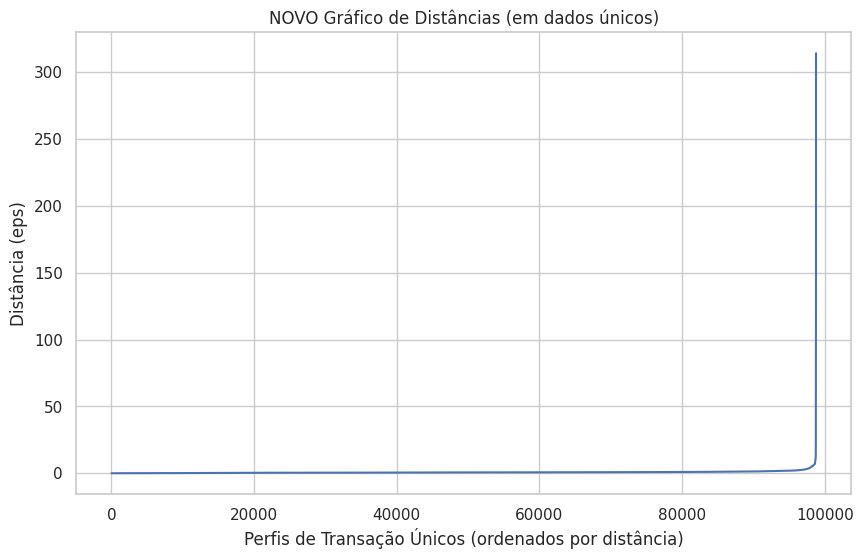

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# --- PASSO 1: Começamos com nosso DataFrame encodado completo ---
# df_encoded_v2 já foi criado no passo anterior

print(f"Número de linhas totais (com duplicatas): {len(df_encoded_v2)}")

# --- PASSO 2 (NOVO E CRUCIAL): Remover perfis de transação duplicados ---
df_unique = df_encoded_v2.drop_duplicates()

print(f"Número de perfis de transação únicos: {len(df_unique)}")

# --- PASSO 3: Normalizar apenas os dados únicos ---
# Agora a normalização será muito mais rápida e significativa
scaler = StandardScaler()
df_unique_scaled = scaler.fit_transform(df_unique)
print("Dados únicos normalizados com sucesso.")

# --- PASSO 4: Recalcular o gráfico de distância no dataset único ---
# O número de vizinhos deve ser ajustado para a nova realidade dos dados
# Vamos manter um valor como 20 para começar
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(df_unique_scaled)
distances, indices = neighbors_fit.kneighbors(df_unique_scaled)

distances = np.sort(distances[:, -1])

# Plotando o NOVO gráfico
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('NOVO Gráfico de Distâncias (em dados únicos)')
plt.xlabel('Perfis de Transação Únicos (ordenados por distância)')
plt.ylabel('Distância (eps)')
plt.grid(True)
plt.show()

In [31]:
from sklearn.neighbors import LocalOutlierFactor

# NOTA: O LOF funciona melhor nos dados encodados, mas não necessariamente normalizados.
# Vamos usar o df_unique que criamos (sem as duplicatas).
# Isso torna o processo mais simples e direto.

print(f"Trabalhando com {len(df_unique)} perfis de transação únicos.")

# 1. Instanciando o modelo LOF
# 'n_neighbors' é o número de vizinhos a serem considerados. 20 é um bom ponto de partida.
# 'contamination' funciona exatamente como no Isolation Forest: é a proporção esperada de outliers.
# 'novelty=True' permite que usemos o método predict.
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005, novelty=True, n_jobs=-1)

print("Treinando o modelo Local Outlier Factor...")
# 2. Treinando o modelo
lof.fit(df_unique)

print("Fazendo previsões nos dados únicos...")
# 3. Fazendo as previsões no mesmo dataset
# Retorna 1 para inliers (normais) e -1 para outliers (anomalias)
previsoes_lof = lof.predict(df_unique)

# 4. Adicionando os resultados ao nosso DataFrame original
# df_unique mantém o índice original do df, então podemos fazer o mapeamento de volta
df.loc[df_unique.index, 'Anomalia_LOF'] = previsoes_lof
print("Previsões do LOF adicionadas ao DataFrame principal.")

Trabalhando com 98771 perfis de transação únicos.
Treinando o modelo Local Outlier Factor...
Fazendo previsões nos dados únicos...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Previsões do LOF adicionadas ao DataFrame principal.


In [33]:
# Filtramos o DataFrame para as anomalias encontradas pelo DBSCAN
anomalias_dbscan = df[df['Anomalia_LOF'] == -1]

print(f"\nO modelo DBSCAN encontrou {len(anomalias_dbscan)} anomalias potenciais na amostra.")

# Vamos ver as anomalias encontradas, ordenando pelas de maior valor
colunas_relevantes = [
    'DATA TRANSAÇÃO', 'NOME ÓRGÃO SUPERIOR', 'NOME FAVORECIDO',
    'TipoDeGasto_v2', # Usando nossa categorização final
    'VALOR TRANSAÇÃO'
]

print("\n--- Anomalias Encontradas pelo DBSCAN (ordenadas por valor) ---")
print(anomalias_dbscan[colunas_relevantes].sort_values(by='VALOR TRANSAÇÃO', ascending=False).to_string())


O modelo DBSCAN encontrou 394 anomalias potenciais na amostra.

--- Anomalias Encontradas pelo DBSCAN (ordenadas por valor) ---
       DATA TRANSAÇÃO                           NOME ÓRGÃO SUPERIOR                                                                         NOME FAVORECIDO          TipoDeGasto_v2  VALOR TRANSAÇÃO
102524     2024-10-03                          Ministério da Defesa                                                          MARAJO LOCACAO E SERVICOS LTDA                Serviços        189650.00
102428     2024-10-04                          Ministério da Defesa                                                    FRANCISCO E. SILVA CAPIISTRANIO LTDA                  Outros        168000.00
108638     2024-10-17     Ministério da Justiça e Segurança Pública                                                                          SEM INFORMACAO  Informática/Tecnologia        122038.19
124072     2024-09-17     Ministério da Justiça e Segurança Pública                